---
title: 'cats and dogs'
description: 'fastai book chapter 2'
date: "2023-08-14"
date-format: iso
image: your_deep_learning_journey_thumbnail.jpg
categories: [fastai, deeplearning, self-study]
toc: true
draft: false
title-block-banner: false
---

[blog](../../../blog.qmd) > [your deep learning journey](../your_deep_learning_journey_post.ipynb) > cats and dogs
---

In [11]:
from fastai.vision.all import *
from torch import *

# check cuda
if torch.cuda.is_available():
    print('We have GPU!')
else:
    print('Sorry, CPU only')

We have GPU!


In [12]:
path = untar_data(URLs.PETS)/'images'

In [13]:
def is_cat(x):
    return x[0].isupper()

In [14]:
dataloaders_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [15]:
learn = vision_learner(dataloaders_dls,resnet34,metrics=error_rate)

In [16]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.171686,0.028764,0.010149,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.049772,0.030464,0.008796,00:17


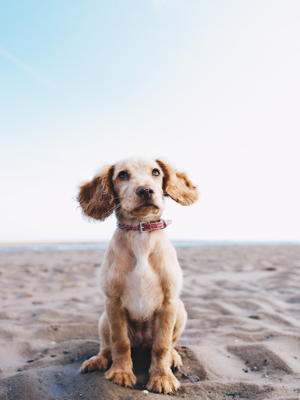

In [17]:
img_dog = PILImage.create('dog.jpg')
img_dog.resize((300,400))

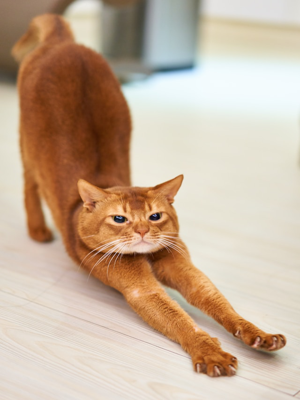

In [18]:
img_cat = PILImage.create('cat.jpg')
img_cat.resize((300,400))

In [19]:
is_cat,_,probs = learn.predict(img_dog)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it is a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it is a cat: 0.000003


In [20]:
is_cat,_,probs = learn.predict(img_cat)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it is a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it is a cat: 1.000000
